# Homework 4

In [2]:
# import things we need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

In [3]:
ufos = pd.read_csv("ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"]) # parse_date is saying which columns should be consdidered date

In [4]:
# (From lecture)
ufos = ufos.fillna({'country':'unknown', 'state':'unkonwn', 'shape':'unknown'})
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unkonwn,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


Just for my use

    Using traitlets and/or widgets build a notebook that:
-Allows the user to change the x and y fields on a scatter plot from the UFO dataset.  Here the "fields" are the names of the columns in the dataset.  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column in for each of x and y.  Note: you don't have to support both axis having a categorical variable (unless you really want to!).

-Allows the user to pick their colormap.  In class we used the log of the duration in seconds as our color scaling, you can use this or something else (or if you *really* want to get fancy you can let the user decide by using a widget!)

# Plot 1

In [9]:
nSamples = 1000
# np.random.seeds(Int)
randomIndices = np.random.choice(range(len(ufos)-1), nSamples, replace=False) # replace=False is to not double count indices
ufosDS = ufos.loc[randomIndices]

In [1]:
# Credit for giving idea how to tackle this: https://kapernikov.com/ipywidgets-with-matplotlib/
@ipywidgets.interact(style=plt.style.available, x_axis=["date", 'longitude'], y_axis=['shape','latitude'])
def ufo_plot(style, x_axis, y_axis):
    with plt.style.context(style):
        plt.plot(ufosDS[x_axis], ufosDS[y_axis], '.')

NameError: name 'ipywidgets' is not defined

So above is my first "prototype". Since I'm working with a desktop, I thought I could skip the sampling step.
I began with one of catergorical and numerical datatypes. At first I was thinking of various things, but the initial focus was on making it at least plot.

Once it worked like a magic(it really did for me), I moved on to think what are some columns that doesn't fit; e.g. I wouldn't put columns related to time on the y axis.

With the list of the columns, I started to sort which column may belong to which axis. However, since this is a scatter plot, I felt there aren't restrictions like time having to be on x axis(although it might look better).


    "date" - still feel like time should be on x axis

    "city" - both

    "state" - outside of U.S. are all shown as unknown, so leaving this out
   
    "country" - both

    "shape" - both
   
    "duration_seconds" - y axis because it's about "how long", not "when".

    "duration" - unit differences in the csv could be misleading!

    "comment" - Not Applicable

    "report_date" - Very similar to "date" so leaving it out for now

    "latitude" - y axis; is there a reason to roatate the map?

    "longitude" - x axis


So then I remade the plot

In [6]:
#@ipywidgets.interact(style=plt.style.available,
#                     x_axis=['city', 'counrty', 'shape', 'longitude'],
#                     y_axis=['date', 'city', 'country', 'shape', 'duration_seconds', 'latitude'])
#def ufo_plot2(style, x_axis, y_axis):
#    with plt.style.context(style):
#        plt.plot(ufos[x_axis], ufos[y_axis], '.')

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

I'm not sure what the problem is. I only added more selections in x and y axis, but it seems like it breaks when both axis are the same?

In [19]:
@ipywidgets.interact(style=plt.style.available,
                     
                     x_axis=['city', 'country', 'shape', 'longitude'],
                     y_axis=['date', 'duration_seconds', 'latitude'])
def ufo_plot2(style, x_axis, y_axis):
    with plt.style.context(style):
        plt.xticks(rotation='vertical')
        if y_axis == 'duration_seconds':
            plt.yscale('log')
        plt.plot(ufosDS[x_axis], ufosDS[y_axis], '.')
        

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

I really thought I wouldn't need to down sample. It seems it looked like it's breaking/bugging because there are too much data to process-maybe it is time to go get threadripper I guess-or learn to go get cup of tea. Thing is, I thought I'd be fine because I remember doing bootstrapping of 50k+ samples last semester and it worked alright back then.

Putting my love for i7 aside, I did realize that some of the combinations of x and y axis seemed a little odd(?). Of course the same x and y would just create a line, so I meant for some other cases which resulted in taking out a few more choices of columns. Also I really couldn't figure out what to do about the names overlapping without making the figsize cover the whole screen.

Another point of improvement was on the duration -> I tried the if statement right after I wrote this. I think yscale was more needed in case of duration compared to other cases. Then I started working on colormap.

In [37]:
@ipywidgets.interact(
    #style=plt.style.available,
                     color=plt.colormaps(),
                     x_axis=['city', 'country', 'shape', 'longitude'],
                     log_choice=['duration_seconds', 'longitude', 'latitude'],
                     y_axis=['date', 'duration_seconds', 'latitude'])
def ufo_plot(color, x_axis, y_axis, log_choice):
    #with plt.style.context(style):
    plt.xticks(rotation='vertical')
#    if y_axis == 'duration_seconds':
#        plt.yscale('log')
    plt.scatter(ufosDS[x_axis], ufosDS[y_axis],
                c=np.log10(ufosDS[log_choice]),
                cmap=color)

interactive(children=(Dropdown(description='color', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG',…

A few things. First, I thought the colormap referred to style when I began the assignment, realized it wasn't while doing the cmap portion. Thought it'd be a cool addition, but it seems that it interfered with cmap thus had to be removed. Second, there are only a handful numerical data contained in the csv: date(technically), duration in seconds, duration, and lastly longitude and latitude.

Because how the date was written, it wasn't going to work. After checking the duration, I forgot about the unit which is string, which caused problem in the log function. And so I was left with the three choices: duration_seconds, long and latitude. I left them as widget to be played with, but I kind of have no idea why would someone want to take log of long/latitude for colormap... Anyways, it's there.

Overall, the graph works in a closest way I intended, yet I cannot think of way to improve the x axis label so far.

# Plot 2

<Figure size 432x288 with 0 Axes>

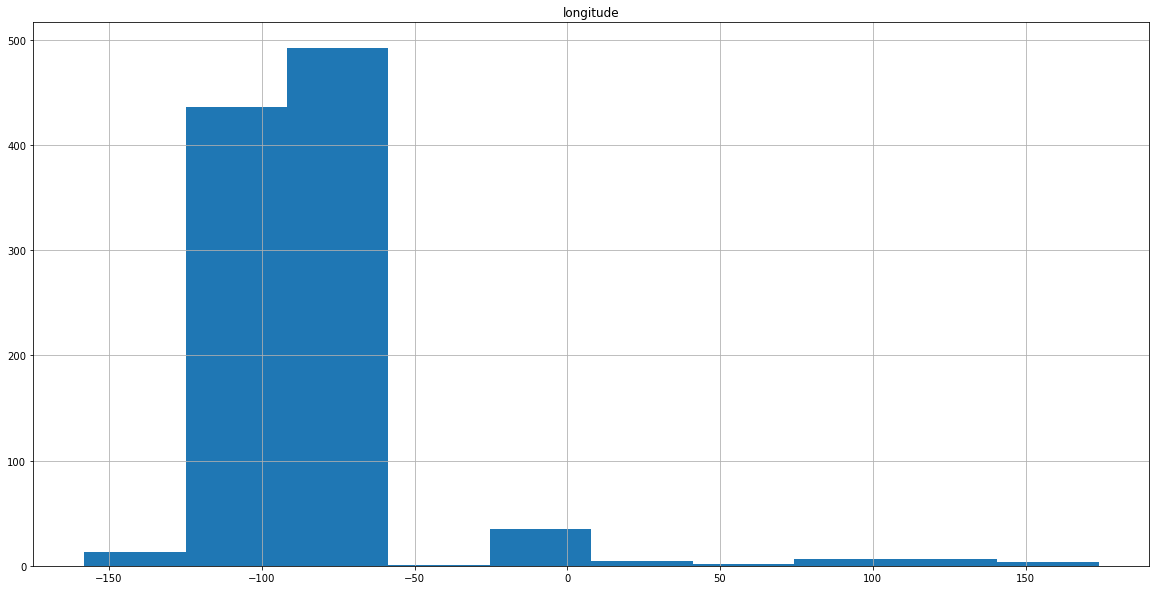

In [36]:
# Starting with the given hint
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
ufosDS.hist(column='longitude', ax=ax)
plt.show()

After trying to figure out how the hint works, I made a frame of the code I'll be working around. The website I sourced earlier helped in this case also for creating the bar widget. I decided to go with 20 for now.

I needed to learn some keys for .hist first; looked at recommended links on hw page.
source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

In [73]:
@ipywidgets.interact(x_hist=['duration_seconds', 'latitude'], 
                     hist_bins=(10,30,1))
def ufo_hist(x_hist, hist_bins):
    fig, ax = plt.subplots(figsize=(20,10))
    ufosDS.hist(x_hist, bins=hist_bins, ax=ax)
    plt.show()

interactive(children=(Dropdown(description='x_hist', options=('duration_seconds', 'latitude'), value='duration…

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D251AC248>],
      dtype=object)

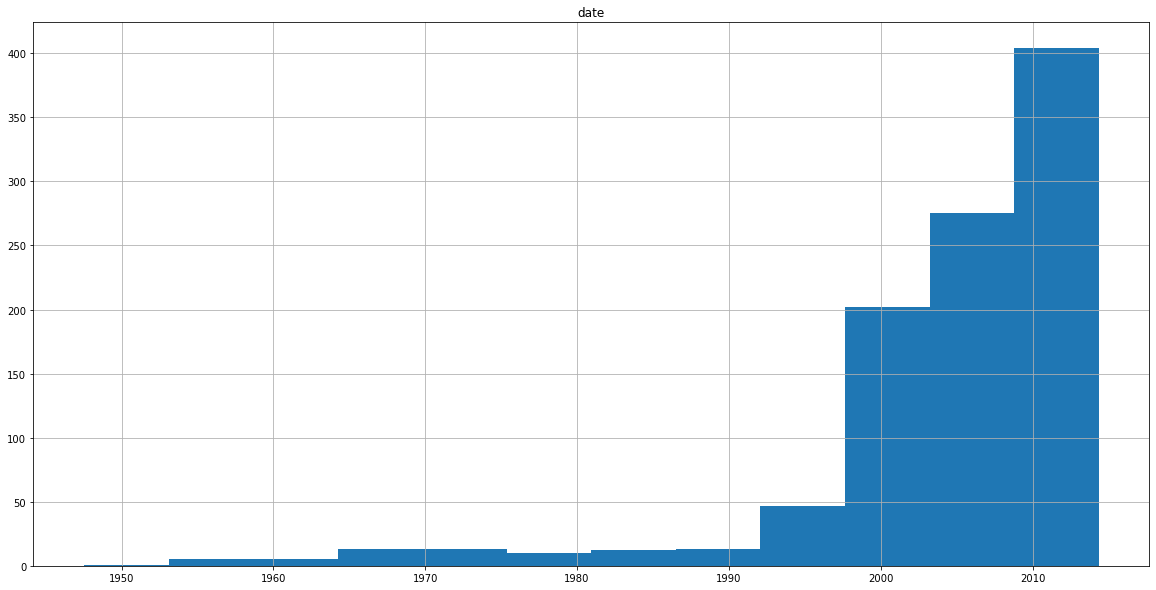

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
# so from this, I know that I have to pass in string of the column name
ufosDS.hist('date', bins=12, ax=ax)

Was running into problems. Some of the error logs:

[  ValueError: hist method requires numerical or datetime columns, nothing to plot. ]
This happened when I tried with categorical data. Which made sense, I can't plot with just the categories even in excel. I needed to figure a way to count the categories for the chart.

[ None of `[]` are in the `[columns]` (something like that) ]

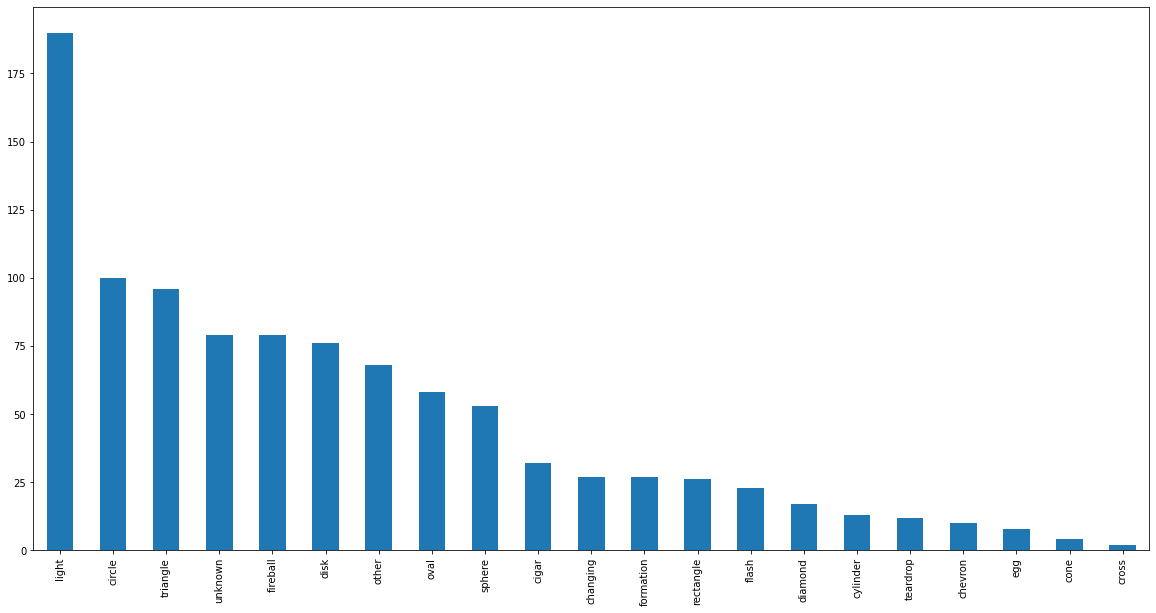

In [77]:
# credit to https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
fig, ax = plt.subplots(figsize=(20,10))
ufosDS['shape'].value_counts().plot(kind='bar')

It seems the .hist() function doesn't process the categorical and count the kinds themselves. But it also made sense that categorial might need a different method to plot; also no need to adjust the number of bins I guess?

Anyway, I tried to come up with the simplest solution I could come up with.

In [90]:
@ipywidgets.interact(x_hist=['duration_seconds', 'latitude', 'longitude', 'shape'], 
                     hist_bins=(10,30,1))
def ufo_hist(x_hist, hist_bins):
    fig, ax = plt.subplots(figsize=(20,10))
    
    if hist_bins == 'shape':
        ufosDS[hist_bins].value_counts().plot(kind='bar')
        
    elif hist_bins != 'shape':
        ufosDS.hist(x_hist, bins=hist_bins, ax=ax)

interactive(children=(Dropdown(description='x_hist', options=('duration_seconds', 'latitude', 'longitude', 'sh…

That was my simplest idea so far-block the string 'shape' from going into .hist() funciton and instead go with the way it worked right above. Another idea to make categorical data work was to use groupby, but I wasn't sure how exactly.

In [95]:
@ipywidgets.interact(x_hist=['duration_seconds', 'shape'], 
                     hist_bins=(10,30,1))
def ufo_hist(x_hist, hist_bins):
    fig, ax = plt.subplots(figsize=(20,10))
    ufosDS[x_hist].value_counts().plot(kind='bar')

interactive(children=(Dropdown(description='x_hist', options=('duration_seconds', 'latitude', 'longitude', 'sh…

If I do it this way, then I can't let them change the number of bins; that's why I go read the instruction over and over again. I guess the number of bins should only be changable for numerical data.

Problem from earlier was that if statement did not work.

In [101]:
@ipywidgets.interact(a=[1,2,[3,4]])
def test(a):
    print(a)

interactive(children=(Dropdown(description='a', options=(1, 2, [3, 4]), value=1), Output()), _dom_classes=('wi…

With the test above, I now know I can't let them have choice within choice(like how it works on bookmark tab; you can have folder inside folder)

In [104]:
@ipywidgets.interact(a=[1,2])

def test(a):
    if a == 1:
        print("it's one")
    elif a ==2:
        print("it's not one")

interactive(children=(Dropdown(description='a', options=(1, 2), value=1), Output()), _dom_classes=('widget-int…

With this test, I know if statement works?

In [126]:
@ipywidgets.interact(x_hist=['duration_seconds', 'longitude', 'latitude', 'shape'], 
                     hist_bins=(10,30,1))

def ufo_hist(x_hist, hist_bins):
#    a = hist_bins

    
    if x_hist == 'shape':
#        print("it's shape")
        ufosDS[x_hist].value_counts().plot(kind='bar', figsize=[20,10], grid=True)
#    elif x_hist == 'duration_seconds':
#        ax=ufosDS.hist(x_hist, bins=hist_bins, figsize=[20,10])
#        ax.set_yscale('log')
#        plt.show()
    else:
#        print("it's not")
        ufosDS.hist(x_hist, bins=hist_bins, figsize=[20,10])
        plt.show()

interactive(children=(Dropdown(description='x_hist', options=('duration_seconds', 'longitude', 'latitude', 'sh…

The commented out elif was my attempt of making the duration_seconds have yscale of log, but I wasn't sure why it wasn't working. It would've really helped the graph, but for now I'll be content that it works as intended at least.

To answer the question I ended up using the same columns over this assignment: duration_seconds, long/lat, and shape. Duration_seconds was the only one with range of numbers, long/lat are numbers but are ultimately meant to be paired with each other to present geographical location (so I felt like it was pointless binning them, they were set of numbers nonetheless), and shape was my go to category due to having a bit more standarized range of data compared to say, comments.

As for picking 2 columns at the same time, I think it's doable with groupby function. If I were to tackle the problem I would set up a temp dataframe of chosen two columns' groupby and plot it accordingly. As far as my current mental capacity goes, I can only think as far as following: it would require a pair of categorical and numerical-then plot as did on categorical data. A pair of categorical probably won't work. A pair of numerical data may work with a bit of extra steps I think; like finding means and such.